# Making simple animation in `Matplotlib`.

Task: make a single point (dot) move about.

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Displaying animation in the notebook

Choose only one option and comment out another.

In [2]:
# Option 1
# %matplotlib qt

In [3]:
# Option 2
from IPython.display import HTML

## Data

In [4]:
def parse_data_to_xy(data: list[tuple]) -> tuple[list, list]:
    """Convert list of points into lists of X and Y values

    Args:
        data (list[tuple]): tuple contains (x, y) coordinates for the respective points

    Returns:
        tuple[list, list]: lists contain all `x` and `y` values respectively
    """

    x_vals = []
    y_vals = []
    for d in data:
        x_vals.append(d[0])
        y_vals.append(d[1])

    return x_vals, y_vals

In [5]:
data = [
    (-1, -1),
    (1, -1),
    (1, 1),
    (-1, 1),
]

In [6]:
x_data, y_data = parse_data_to_xy(data)

In [7]:
x_data

[-1, 1, 1, -1]

In [8]:
y_data

[-1, -1, 1, 1]

## Animate dot using `ax.plot()`

### Slow motion

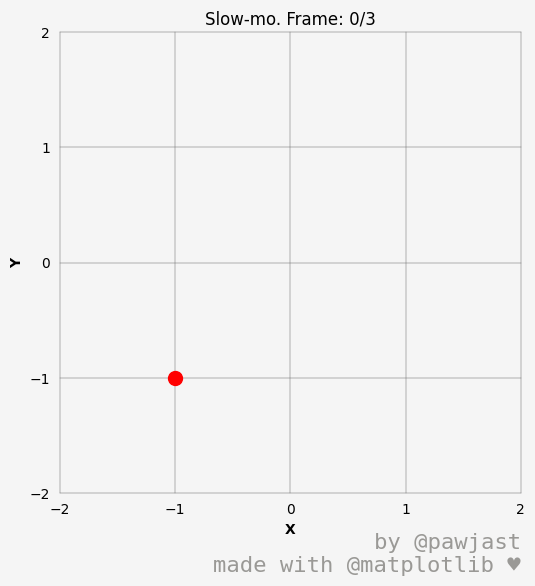

In [9]:
# CREATE FIGURE AND AXES
fig, ax = plt.subplots(
    figsize=(6, 6),
    facecolor="whitesmoke",
    layout="tight"
)

# STYLIZE THE PLOT
ax.set_aspect("equal")
ax.set_frame_on(False)  # remove bg colour and spines

ax.set_xlabel("X", weight="bold")
ax.set_ylabel("Y", weight="bold")

SQUARE_SIZE = 2

ax.set_xlim(-SQUARE_SIZE, SQUARE_SIZE)
ax.set_ylim(-SQUARE_SIZE, SQUARE_SIZE)
ax.set_xticks(
    ticks=range(-SQUARE_SIZE, SQUARE_SIZE+1)
)
ax.set_yticks(
    ticks=range(-SQUARE_SIZE, SQUARE_SIZE+1)
)
ax.tick_params(
    color=(0, 0, 0, 0)
)

ax.grid(
    color="dimgray",
    lw=0.35,
    clip_on=False,
)

# Footer
ax.text(
    1, -0.18,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# SET UP AND STYLIZE EMPTY PLOT THAT'S GOING TO BE ANIMATED
my_plot, = ax.plot(
    [], [],
    color="red",
    lw=0,
    marker="o",
    markersize=10,
)

title_txt = ax.set_title("")


# CREATE FRAME UPDATE FUNCTION
def update(frame):
    "Update data for each frame"

    # Note:
    # `x` and `y` MUST be a sequence.
    # In this case slicing produces a single number each time.
    # Hence a need to wrap them inside a list.
    x = [x_data[frame]]
    y = [y_data[frame]]

    my_plot.set_xdata(x)
    my_plot.set_ydata(y)

    title_txt.set_text(f"Slow-mo. Frame: {frame}/{len(data)-1}")

    return my_plot, title_txt


# RUN THE ANIMATION
ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=len(data),
    interval=450,
);

In [10]:
HTML(ani.to_jshtml())

### Save to a file

In [11]:
# ani.save(filename="01_slowmo_4_points.gif", writer="ffmpeg")

## Animate dot using ax.scatter()

### Plot

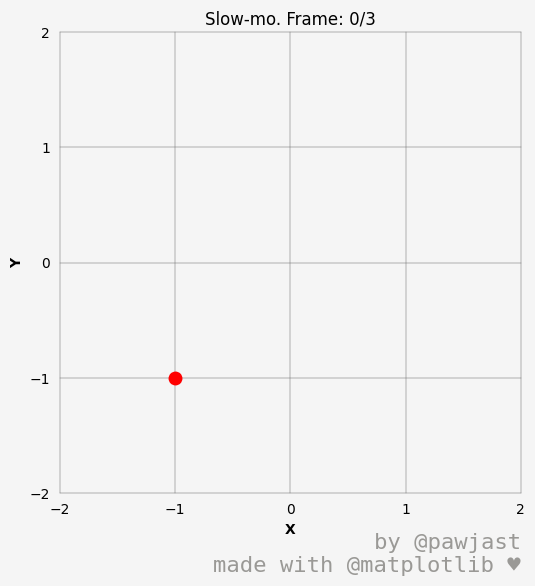

In [12]:
# CREATE FIGURE AND AXES
fig, ax = plt.subplots(
    figsize=(6, 6),
    facecolor="whitesmoke",
    layout="tight"
)

# STYLIZE THE PLOT
ax.set_aspect("equal")
ax.set_frame_on(False)  # remove bg colour and spines

ax.set_xlabel("X", weight="bold")
ax.set_ylabel("Y", weight="bold")

SQUARE_SIZE = 2

ax.set_xlim(-SQUARE_SIZE, SQUARE_SIZE)
ax.set_ylim(-SQUARE_SIZE, SQUARE_SIZE)
ax.set_xticks(
    ticks=range(-SQUARE_SIZE, SQUARE_SIZE+1)
)
ax.set_yticks(
    ticks=range(-SQUARE_SIZE, SQUARE_SIZE+1)
)
ax.tick_params(
    color=(0, 0, 0, 0)
)

ax.grid(
    color="dimgray",
    lw=0.35,
    clip_on=False,
)
ax.set_axisbelow(True)  # Move grid behind the plot items

# Footer
ax.text(
    1, -0.18,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# SET UP AND STYLIZE EMPTY PLOT THAT'S GOING TO BE ANIMATED
my_scat = ax.scatter(
    [], [],
    color="red",
    lw=0,
    marker="o",
    s=10**2,
)

title_txt = ax.set_title("")


# CREATE FRAME UPDATE FUNCTION
def update(frame):
    "Update data for each frame"

    my_scat.set_offsets(
        [
            x_data[frame],
            y_data[frame]
        ]
    )

    title_txt.set_text(f"Slow-mo. Frame: {frame}/{len(data)-1}")

    return my_plot, title_txt


# RUN THE ANIMATION
ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=len(data),
    interval=450,
);

In [13]:
HTML(ani.to_jshtml())